# SC12x

## 데이터 탐색 및 가설 검정

이번 SC 에서 여러분은 가상의 마케팅 데이터를 활용한 통계 분석을 진행하시게 됩니다. 

## 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다룹니다. 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**
> 2,240 customers of XYZ company:

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)
- Country - 고객의 국적

## Part 1 - 데이터 불러오기

### 1) 데이터셋을 업로드합니다

In [1]:
# 1차
# from google.colab import files

# uploaded = files.upload()

In [2]:
# 2차
data_url = 'https://docs.google.com/uc?export=download&id=1tLxd_JW-XNs9KidARE9oBXjqo998D1yM'

### 2) 결측치가 있는지 확인한 후 있다면 제거하세요

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# df = pd.read_csv('./sc12x_dataset.csv', encoding='cp949')
df = pd.read_csv(data_url, encoding='cp949')
df.isna().sum()

Unnamed: 0            0
ID                    0
Year_Birth            0
Country               0
Education             0
Marital_Status        0
 Income              24
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0           0
ID                   0
Year_Birth           0
Country              0
Education            0
Marital_Status       0
 Income              0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
dtype: int64

### 3) 아래의 특성들을 만드세요

1. **TotalMntProducts** - 최근 2년간 구매한 모든 제품 가격들을 합한 값을 가진 계산한 특성입니다

2. **TotalNumPurchases** - 구매횟수를 모두 합친 값을 가진 특성입니다

3. **DaysSinceJoined** - 오늘 날짜를 기준으로 가입한 기간을 보여주는 특성입니다 

4. **VIP** - 누적 구매 금액이 $2,000 이상을 넘고, 오늘을 기준으로 가입기간이 5년 이상이 된다면 1, 아니면 0의 값을 가진 칼럼을 만듭니다

In [6]:
from datetime import datetime

mnt_list = list(df.loc[:, 'MntWines':'MntGoldProds'])
num_list = list(df.loc[:, 'NumDealsPurchases':'NumStorePurchases'])
df['TotalMntProducts'] = df.loc[:, mnt_list].sum(axis=1)
df['TotalNumPurchases'] = df.loc[:, num_list].sum(axis=1)
df['DaysSinceJoined'] = (datetime.now() - pd.to_datetime(df['Dt_Customer'])).dt.days
df['VIP'] = np.where((df['TotalMntProducts'] >= 2000) & (df['DaysSinceJoined'] >= 365*5), 1, 0)

df.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases,DaysSinceJoined,VIP
0,0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,6,1,0,1190,11,2677,0
1,1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,7,5,0,577,15,2678,0
2,2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,5,2,0,251,9,2711,0
3,3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,2,7,0,11,4,2713,0
4,4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,2,7,0,91,7,2746,0


## Part 2 - 가설 검정

### Hypothesis Test    
   - 수치형 (numerical/continuous) 칼럼이 어떤 차이를 보이는지 t-test를 통해 가설을 세우고 검증하세요. (최소 2개)
   - 범주형 (categorical) 칼럼이 어떤 차이를 보이는지 $\chi^2-test$를 통해 가설을 세우고 검증하세요. (최소 2개)  
  **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다. 그리고 [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)를 사용하면 $\chi^2$ statistics 를 계산할 수 있습니다.    

In [7]:
!pip install scipy --upgrade

In [8]:
# t-test
# 1. 평균적으로 어류보다 정육을 많이 구매했을 것이다
# H0 : np.mean(MntMeatProducts) = np.mean(MntFishProducts)
# H1 : np.mean(MntMeatProducts) > np.mean(MntFishProducts)
meat = df['MntMeatProducts']
fish = df['MntFishProducts']
t_ans, pv_ans = stats.ttest_ind(meat, fish, alternative='greater')
print(t_ans)
print(pv_ans)

if((pv_ans) >= 0.05):
  ans = '없음'
elif((t_ans > 0) & ((pv_ans) < 0.05)):
  ans = '정육'
else:
  ans = '어류'

ans

26.376211620426563
7.777240283327478e-143


'정육'

In [9]:
# 2. 평균적으로 총 구매 횟수가 10회 정도일 것이다
# H0 = np.mean(TotalNumPurchases) == 10
# H1 = np.mean(TotalNumPurchases) != 10
total_purchases = df['TotalNumPurchases']
print(np.mean(total_purchases))

print(stats.ttest_1samp(total_purchases, 10))

pv = stats.ttest_1samp(total_purchases, 10).pvalue
pv
# pv <= 0.05 이므로 H0는 기각

12.209837545126353
Ttest_1sampResult(statistic=17.748372030590293, pvalue=5.306078062355462e-66)


5.306078062355462e-66

In [10]:
# 참고

"""
귀무 가설 : 웹에서의 구매횟수와 가게의 구매횟수 평균은 통계적으로 유의미한 차이가 없다
대안 가설 : 웹에서의 구매횟수와 가게의 구매횟수 평균은 통계적으로 유의미한 차이가 있을 것이다


t-test로 웹에서의 구매횟수와 가게에서의 구매횟수를 비교했을 때 p-value가 0.05보다 매우 낮게 나왔으므로 귀무가설을
기각하고, 웹에서의 구매횟수와 가게의 구매횟수 평균은 통계적으로 유의미한 차이가 있다고 결론 지을 수 있다.

""" 

stats.ttest_ind(df['NumWebPurchases'], df['NumStorePurchases'])

Ttest_indResult(statistic=-18.994289044976455, pvalue=2.103546667549773e-77)

In [11]:
# chi_square test
# 1. 국적과 학력은 연관이 있다
# H0 : 국적과 학력은 연관이 없다
# H1 : 국적과 학력은 연관이 있다
df_nat_edu = pd.crosstab(df['Country'], df['Education'])
df_nat_edu.head()

_, df_nat_edu_p, _, _ = stats.chi2_contingency(df_nat_edu)
df_nat_edu_p
# p-value가 0.05보다 크기 때문에 귀무가설을 채택한다.
# 따라서 국적과 학력은 연관이 없다고 볼 수 있다.

0.37432259145466185

In [12]:
# 2. 학력과 혼인 여부는 관계가 있다
# H0 : 학력과 혼인 여부는 관계가 없다
# H1 : 학력과 혼인 여부는 관계가 있다
df_edu_mar = pd.crosstab(df['Education'], df['Marital_Status'])
df_edu_mar.head()

_, df_edu_mar_p, _, _ = stats.chi2_contingency(df_edu_mar)
df_edu_mar_p
# p-value가 0.05보다 크기 때문에 귀무가설을 채택한다.
# 따라서 학력과 혼인 여부는 연관이 없다고 볼 수 있다.

0.5304403824967144

In [13]:
# 참고

"""
귀무 가설 : 소비자의 국적과 교육 수준 차이는 서로 연관이 없을 것이다.
대안 가설 : 소비자의 국적과 교육 수준 차이는 서로 연관이 있을 것이다.


chi-square로 소비자의 국적과 교육 수준 차이 간에 관계 (독립인지 종속인지) 를 비교했을 때, p-value가 0.3이 나왔으므로
귀무가설을 기각하지 못하며, 소비자의 국적과 교육 수준 차이는 서로 연관이 없다고 결론 지을 수 있다.

""" 

stats.chi2_contingency(pd.crosstab(df['Education'], df['Country']))

(29.769450542095363,
 0.3743225914546619,
 28,
 array([[1.32671480e+01, 2.40072202e+01, 1.04693141e+01, 1.32671480e+01,
         2.70758123e-01, 3.04151625e+01, 9.86462094e+01, 9.65703971e+00],
        [3.58212996e+00, 6.48194946e+00, 2.82671480e+00, 3.58212996e+00,
         7.31046931e-02, 8.21209386e+00, 2.66344765e+01, 2.60740072e+00],
        [7.40306859e+01, 1.33960289e+02, 5.84187726e+01, 7.40306859e+01,
         1.51083032e+00, 1.69716606e+02, 5.50445848e+02, 5.38862816e+01],
        [2.42125451e+01, 4.38131769e+01, 1.91064982e+01, 2.42125451e+01,
         4.94133574e-01, 5.55076715e+01, 1.80029332e+02, 1.76240975e+01],
        [3.19074910e+01, 5.77373646e+01, 2.51787004e+01, 3.19074910e+01,
         6.51173285e-01, 7.31484657e+01, 2.37244134e+02, 2.32251805e+01]]))

## Part 3 - Analysis and Interpretation

자, 위 파트들에서 우리는 데이터들을 잘 관찰했습니다. 다음의 질문들에 텍스트로 답변하십시오.  

1) 여러분들이 수행한 두 개 이상의 t-test 들을 해석하고 설명해 보세요.
2) 여러분들이 수행한 두 개 이상의 $\chi^2$ test 들을 해석하고 설명해 보세요.

**t-test**
1. 평균적으로 어류보다 정육을 많이 구매했을 것이라는 가설을 대안가설로 하여 One-tailed t-test를 시행하였다. 그 결과 p값은 0.05보다 작게 나왔다. p값이 0.05보다 작게 나왔으므로 두 집단의 평균의 차이가 유의미하다고 볼 수 있다. 또한 통계치가 0보다 크게 나왔다. 즉, 평균적으로 어류보다 정육을 많이 구매했을 것이라고 볼 수 있다.

2. 고객들의 평균 구매 횟수가 10회 정도일 것이라는 가설을 귀무가설로 하여 t-test를 시행하였다. 그 결과 p값이 0.05보다 작게 나왔으므로 고객들의 평균 구매 횟수는 10회 정도가 아닐 것으로 볼 수 있다.

**chi square test**
1. 국적과 학력은 연관이 없다는 가설을 귀무가설로 하여 chi squared test를 시행하였다. 그 결과 p값이 0.05보다 크게 나왔으므로 귀무가설을 채택하여 고객들의 국적과 학력은 연관이 없다고 볼 수 있다.

2. 학력과 혼인 여부는 관계가 없다는 가설을 귀무가설로 하여 chi squared test를 시행하였다. 그 결과 p값이 0.05보다 크게 나왔으므로 귀무가설을 채택하여 고객들의 학력과 혼인 여부는 연관이 없다고 볼 수 있다.

# Advanced Goals: 
> SC 에서 3점을 얻고 싶으시다면 아래의 문제를 모두 풀어주세요. 다만 2점을 얻었다면 충분합니다. 시간과 여유가 있는 분들만 도전해 보시기 바랍니다. 

## Part 1: 

여러분들의 dataframe column들이 적절한 data type을 가지도록 작업해 보세요.   
**Hint:** 특정 column datatype 이 float 이나 integer 로 되어있음에도 불구하고 "object" 라고 되어 있는 경우가 있습니다. 이 경우, `pd.to_numeric()`, `pd.to_datetime()` 과 같은 방법으로 칼럼들을 변환해 보세요. 
주석을 통해 읽는 이가 쉽게 읽을 수 있고, 전체 내용을 쉽게 따라갈 수 있다면 3점을 얻을 수 있습니다. 

## Part 2:

데이터 셋의 적절한 column들의 조합으로 $t-test$와 $\chi^2 test$가 쉽게 수행될 수 있도록 함수를 작성해 보세요.
**데이터 타입에 알맞은 가설검정이 실행되야 하는 것을 잊지 마세요**

## Part 3: 
평균 추정치에 대한 신뢰 구간(confidence interval)을 계산하고 결과를 작성하세요 (최소 두 개 선택). 계산한 추정치가 얼마나 정확한지 시각적으로 확인할 수 있도록 matplotlib, seaborn 등의 시각화 라이브러리를 활용해서 나타내세요

In [14]:
# Part 1
df.dtypes

Unnamed: 0            int64
ID                    int64
Year_Birth            int64
Country              object
Education            object
Marital_Status       object
 Income              object
Kidhome               int64
Teenhome              int64
Dt_Customer          object
Recency               int64
MntWines              int64
MntFruits             int64
MntMeatProducts       int64
MntFishProducts       int64
MntSweetProducts      int64
MntGoldProds          int64
NumDealsPurchases     int64
NumWebPurchases       int64
NumStorePurchases     int64
NumWebVisitsMonth     int64
Complain              int64
TotalMntProducts      int64
TotalNumPurchases     int64
DaysSinceJoined       int64
VIP                   int64
dtype: object

In [15]:
df.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases,DaysSinceJoined,VIP
0,0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,6,1,0,1190,11,2677,0
1,1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,7,5,0,577,15,2678,0
2,2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,5,2,0,251,9,2711,0
3,3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,2,7,0,11,4,2713,0
4,4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,2,7,0,91,7,2746,0


In [16]:
#컬럼명 변경
df.rename(columns={' Income ': 'Income'}, inplace=True)

# 고객의 연간 수입을 float로 형변환
def toNum(input):
  return float(input.replace('$','').replace(',',''))
df['Income'] = df['Income'].apply(toNum)

# 고객의 서비스 가입 시기를 날짜 형식으로 변경
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases,DaysSinceJoined,VIP
0,0,1826,1970,SP,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,6,1,0,1190,11,2677,0
1,1,1,1961,CA,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,7,5,0,577,15,2678,0
2,2,10476,1958,US,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,5,2,0,251,9,2711,0
3,3,1386,1967,AUS,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,2,7,0,11,4,2713,0
4,4,5371,1989,SP,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,2,7,0,91,7,2746,0


In [17]:
df.dtypes

Unnamed: 0                    int64
ID                            int64
Year_Birth                    int64
Country                      object
Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
Complain                      int64
TotalMntProducts              int64
TotalNumPurchases             int64
DaysSinceJoined               int64
VIP                           int64
dtype: object

In [18]:
# Part 2
import numbers

def t_test(a, b, alter='two-sided'):
  if(a.dtypes == np.object):
    err = 'a의 타입이 수치형이 아님'
    return err
  if(b.dtypes == np.object):
    err = 'b의 타입이 수치형이 아님'
    return err

  t_ans, pv_ans = stats.ttest_ind(a, b, alternative=alter)
  return t_ans, pv_ans

t_test(df['MntMeatProducts'], df['MntFishProducts'], 'greater')

(26.376211620426563, 7.777240283327478e-143)

In [19]:
def chi_test(a, b):
  if(a.dtypes != np.object):
    err = 'a의 타입이 범주형이 아님'
    return err
  if(b.dtypes != np.object):
    err = 'b의 타입이 범주형이 아님'
    return err

  df_tmp = pd.crosstab(a, b)
  chi, p, _, _ = stats.chi2_contingency(df_tmp)
  return chi, p

chi_test(df['Country'], df['Education'])

(29.76945054209536, 0.37432259145466185)

In [ ]:
# 참고
### 이곳에 Part 2 답안을 작성해주시기 바랍니다

def which_test_by_dtypes(df1, df2):
    
    # 사용자 지정 함수 영역 내에서 라이브러리 import
    import numpy as np
    from scipy.stats import ttest_ind, chi2_contingency
        
    # t-test    
    if (np.issubdtype(df1.dtype, np.number)) & (np.issubdtype(df2.dtype, np.number)):
        return ttest_ind(df1, df2)
    
    # chi-square
    else :
        cross = pd.crosstab(df1, df2)
        return chi2_contingency(cross)[:2]

In [20]:
# Part 3
def confidence_interval(data, confidence = 0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    # standard error of the mean.
    # scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')
    stderr = stats.sem(data) 

    # ddof = delta 자유도. 표본의 편향을 조정할 자유도입니다. 기본값은 1
    interval = stderr * stats.t.ppf((1+confidence)/2 , n-1)

    # 리턴 값으로는 평균에서 구간을 빼고, 더한 값 두개를 리턴합니다.
    return (mean - interval, mean + interval)

In [21]:
s1 = df.sample(n=20, random_state=42)
s2 = df.sample(n=200, random_state=42)

s1_mean = s1['Income'].mean()
print(s1_mean)
s2_mean = s2['Income'].mean()
print(s2_mean)

52148.65
54383.135


In [22]:
CI1 = confidence_interval(s1['Income'])
CI2 = confidence_interval(s2['Income'])
CI1, CI2

((40865.68108916119, 63431.61891083881),
 (51517.17996096207, 57249.09003903793))

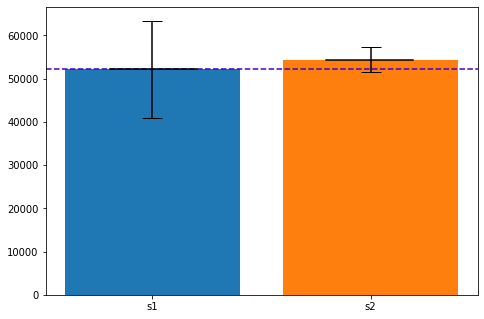

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

sample = ['s1', 's2']
pop_mean = np.mean(df['Income'])

plt.bar(x='s1', height=s1_mean, yerr=CI1[0]-s1_mean, capsize=10)
plt.bar(x='s2', height=s2_mean, yerr=CI2[0]-s2_mean, capsize=10)
plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(s1_mean, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(s2_mean, color = 'black', xmin = 0.65, xmax = 0.85)

plt.show()